In [ ]:
#BREAST CANCER DATASET

#Hastaların tümörlerine ait çeşitli özelliklere bakarak iyi huylu (benign)
#ve kötü huylu (malignant) tümörleri sınıflandırmak.

#0--->maligant(kötü huylu)
#1--->benign(iyi huylu)





In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#VERİ YÜKLEME ve AYIRMA

cancer=load_breast_cancer()#veri setini yükle

X=cancer.data
y=cancer.target

print("Sınıflar:",cancer.target_names)#maligant,benign
print("Özellik Sayısı:",X.shape[1])#özellikler

Sınıflar: ['malignant' 'benign']
Özellik Sayısı: 30


In [ ]:
#EĞİTİM VE TEST VERİSİ OLUŞTURMA
#80 eğitim %20 test olmak üzere ayırıldı

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
#MODEL KURULUMU VE EĞİTİMİ(lojistik regresyon)

model=LogisticRegression(max_iter=10000)
#model oluştu döngü veri büyüküğüne karşı yüksek tutuldu

model.fit(X_train,y_train)#model eğitimi


#ikili sınıflandırmalarda lojistik regraesyon ideal bir snıflandırma yöntemidir

LogisticRegression(max_iter=10000)

In [ ]:
#TAHMİN VE DOĞRULUK HESABI

y_pred=model.predict(X_test)
#test verisi üzerinden tahminde bulunma

accuracy=accuracy_score(y_test,y_pred)
#doğru tahmin oranı hesaplandığı yer

print("Model Doğruluğu (accuracy)",accuracy)


Model Doğruluğu (accuracy) 0.956140350877193


In [ ]:
#SINIFLANDIRMA RAPORU ve confusion_matrix

print("Sınıflandırma Rapporu:\n",
      classification_report(y_test,y_pred,target_names=cancer.target_names))
#precision recall f1 verir


cm=confusion_matrix(y_test,y_pred)

Sınıflandırma Rapporu:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



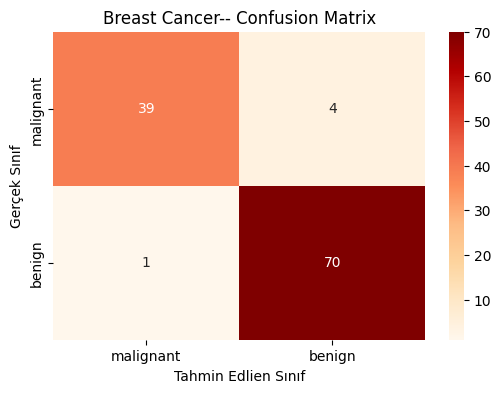

In [ ]:
#Confusion Matrix Görselleştirme

plt.figure(figsize=(6,4))

sns.heatmap(cm,annot=True,fmt='d',cmap="OrRd",
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names
            )

plt.xlabel("Tahmin Edlien Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Breast Cancer-- Confusion Matrix")

plt.show()

In [ ]:
"""
Matrix Özeti:
Gerçek/Tahmin      melignant(0)     benign(1)

melignant(0)           39             4

benign(1)              1             70


Gerçek malignant → Tahmin malignant → 39 doğru
Yani gerçekten kötü huylu olan 39 tümörü model doğru tahmin etti.

Gerçek malignant → Tahmin benign → 4 hata
Bu çok kritik!
Model, 4 adet kötü huylu tümörü yanlışlıkla iyi huylu tahmin etmiş.
Gerçek dünyada bu hatanın ciddi sonuçları olabilir (yanlış güven).


Gerçek benign → Tahmin malignant → 1 hata
Model 1 adet iyi huylu tümörü yanlışlıkla kötü huylu olarak sınıflandırmış.
Bu da yanlış alarm (hassaslık yüksek olabilir ama özgüllük biraz düşmüş).

False Negative (FN) = 4 → Gerçek kötü huylu ama model iyi huylu demiş
Bu en riskli hata türüdür, çünkü hastalık gözden kaçabilir
(tedavi gecikir, ölüm riski artar)

False Positive (FP) = 1 → Gerçek iyi huylu ama model kötü huylu demiş
Daha az tehlikelidir, ama hastaya gereksiz stres ve testler uygulanabilir




"""

'\nMatrix Özeti:\nGerçek/Tahmin      melignant(0)     benign(1)\n\nmelignant(0)           39             4\n\nbenign(1)              1             70\n'